# Performance evaluation of Keypoint Detectors and Descriptors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook  


data = pd.read_csv('performance.csv', delimiter=',')   

In [2]:
data.sample(20)

,ImgNum,KptDetector,TotalNumOfKpts,DetectionTime,NumrOfKptsInROI,DescriptorType,ExtractionTime,Matcher,Selector,NumOfMatches,MatchingTime
153,3,BRISK,2735,40.26310,277,BRISK,3.576540,BF,KNN,133.0,2.465740
70,0,HARRIS,115,3.22598,17,ORB,0.691024,NaN,NaN,NaN,NaN
294,4,AKAZE,1360,78.09140,163,AKAZE,62.994000,BF,KNN,117.0,0.881742
43,3,SHITOMASI,1358,11.55610,120,SIFT,14.447300,BF,KNN,104.0,0.293568
152,2,BRISK,2741,41.08310,282,BRISK,3.076700,BF,KNN,144.0,2.461780
15,5,SHITOMASI,1284,14.31220,113,BRIEF,1.250540,BF,KNN,92.0,0.299460
273,3,AKAZE,1351,68.93720,155,ORB,2.947780,BF,KNN,96.0,0.557266
160,0,BRISK,2757,41.89310,264,BRIEF,1.028930,NaN,NaN,NaN,NaN
140,0,FAST,5063,2.03684,419,SIFT,29.822200,NaN,NaN,NaN,NaN
276,6,AKAZE,1363,69.37570,173,ORB,3.233170,BF,KNN,116.0,0.546075


In [3]:
data.groupby('KptDetector').mean()[['DetectionTime','TotalNumOfKpts','NumrOfKptsInROI']]


,DetectionTime,TotalNumOfKpts,NumrOfKptsInROI
KptDetector,,,
AKAZE,69.028577,1342.9,167.0
BRISK,40.569064,2711.6,276.2
FAST,2.008693,4920.4,409.4
HARRIS,5.595951,173.7,24.8
ORB,7.366129,500.0,116.1
SHITOMASI,13.935128,1342.3,117.9
SIFT,117.792968,1386.2,138.6


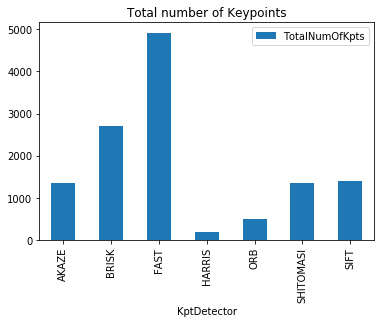

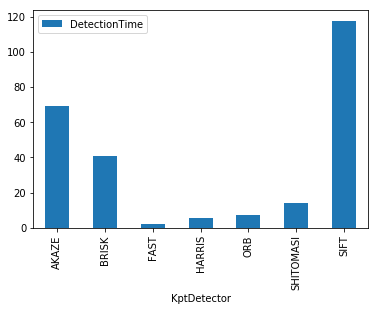

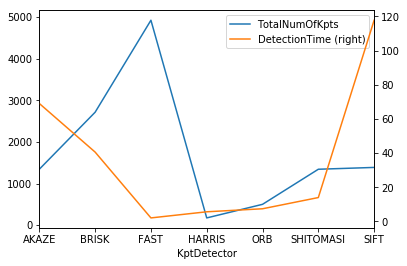

In [4]:
data.groupby('KptDetector').mean()[['TotalNumOfKpts']].plot.bar(title='Total number of Keypoints')
data.groupby('KptDetector').mean()[['DetectionTime']].plot.bar()
plt.show()

data.groupby('KptDetector').mean()[['TotalNumOfKpts','DetectionTime']].plot(secondary_y=['DetectionTime'])
plt.show()

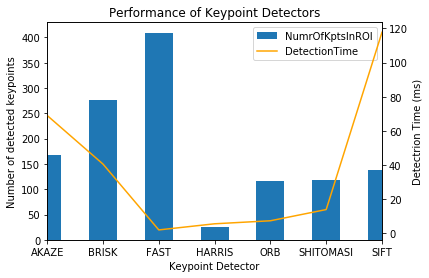

In [5]:
ax = data.groupby('KptDetector').mean()[['NumrOfKptsInROI']].plot.bar(title='Performance of Keypoint Detectors')
ax2 = data.groupby('KptDetector').mean()[['DetectionTime']].plot(secondary_y=['DetectionTime'], ax=ax, mark_right=False, color='orange')
ax.set_xlabel("Keypoint Detector")
ax.set_ylabel("Number of detected keypoints")
ax2.set_ylabel("Detectrion Time (ms)")

plt.show()

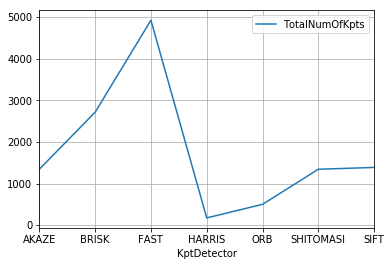

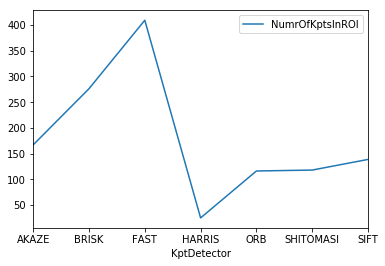

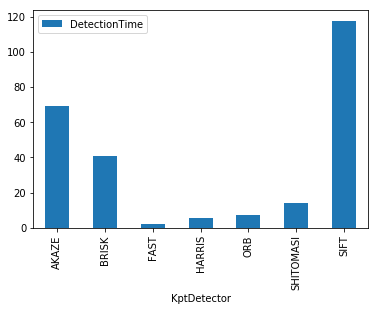

In [6]:
data.groupby('KptDetector').mean()[['TotalNumOfKpts']].plot(grid=True)
data.groupby('KptDetector').mean()[['NumrOfKptsInROI']].plot()
data.groupby('KptDetector').mean()[['DetectionTime']].plot.bar()
plt.show()

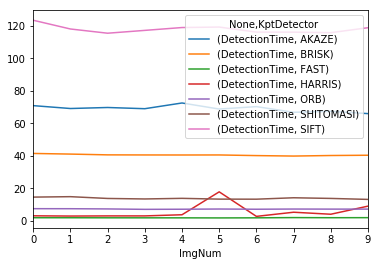

In [7]:
data.groupby(['ImgNum','KptDetector'])[['DetectionTime']].mean().unstack().plot()
plt.show()

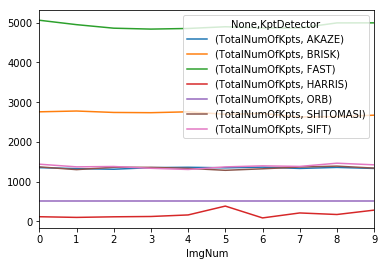

In [8]:
data.groupby(['ImgNum','KptDetector'])[['TotalNumOfKpts']].mean().unstack().plot()
plt.show()

In [9]:
data['TotalTime'] = data['DetectionTime'] + data['ExtractionTime'] # + data['MatchingTime']
data.groupby(['KptDetector','DescriptorType'])[['TotalNumOfKpts','NumrOfKptsInROI','DetectionTime','ExtractionTime','MatchingTime','NumOfMatches','TotalTime']].mean()
#ImgNum 	KptDetector 	TotalNumOfKpts 	DetectionTime 	NumrOfKptsInROI 	DescriptorType 	ExtractionTime 	Matcher 	Selector 	NumOfMatches 	MatchingTime

TotalNumOfKpts  NumrOfKptsInROI  DetectionTime  \
KptDetector DescriptorType                                                   
AKAZE       AKAZE                   1342.9            167.0      67.496250   
            BRIEF                   1342.9            167.0      69.893700   
            BRISK                   1342.9            167.0      68.885660   
            FREAK                   1342.9            167.0      67.463150   
            ORB                     1342.9            167.0      69.199700   
            SIFT                    1342.9            167.0      71.233000   
BRISK       BRIEF                   2711.6            276.2      40.589870   
            BRISK                   2711.6            276.2      40.711640   
            FREAK                   2711.6            276.2      40.349720   
            ORB                     2711.6            276.2      40.301090   
            SIFT                    2711.6            276.2      40.893000   
FAST        BRIEF                   4920.4            409.4       2.037556   
            BRISK                   4920.4            409.4       2.007325   
            FREAK                   4920.4            409.4       1.966818   
            ORB                     4920.4            409.4       2.025236   
            SIFT                    4920.4            409.4       2.006531   
HARRIS      BRIEF                    173.7             24.8       5.585637   
            BRISK                    173.7             24.8       5.630727   
            FREAK                    173.7             24.8       5.569558   
            ORB                      173.7             24.8       5.568037   
            SIFT                     173.7             24.8       5.625797   
ORB         BRIEF                    500.0            116.1       7.345355   
            BRISK                    500.0            116.1       7.556562   
            FREAK                    500.0            116.1       7.230722   
            ORB                      500.0            116.1       7.410937   
            SIFT                     500.0            116.1       7.287068   
SHITOMASI   BRIEF                   1342.3            117.9      14.703690   
            BRISK                   1342.3            117.9      16.609240   
            FREAK                   1342.3            117.9      11.725150   
            ORB                     1342.3            117.9      14.736410   
            SIFT                    1342.3            117.9      11.901150   
SIFT        BRIEF                   1386.2            138.6     125.135000   
            BRISK                   1386.2            138.6     123.325000   
            FREAK                   1386.2            138.6     124.381500   
            SIFT                    1386.2            138.6      98.330370   

                            ExtractionTime  MatchingTime  NumOfMatches  \
KptDetector DescriptorType                                               
AKAZE       AKAZE                57.405820      0.865429    130.222222   
            BRIEF                 0.913102      0.542822    120.777778   
            BRISK                 2.007982      1.016588    123.333333   
            FREAK                40.226490      0.963463    108.111111   
            ORB                   3.084214      0.670763    102.000000   
            SIFT                 24.671290      0.645904    141.111111   
BRISK       BRIEF                 1.066747      1.341196    149.333333   
            BRISK                 3.204348      2.413040    144.222222   
            FREAK                41.307240      2.059710    121.444444   
            ORB                   4.463011      1.371853    103.666667   
            SIFT                 41.011780      1.584224    182.888889   
FAST        BRIEF                 1.561618      2.744046    242.000000   
            BRISK                 4.469525      5.078121    203.555556   
            FREAK              

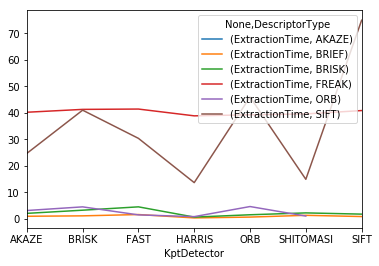

In [10]:
data.groupby(['KptDetector','DescriptorType'])[['ExtractionTime']].mean().unstack().plot()